# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests
import os
from bs4 import BeautifulSoup

In [2]:
dog_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
dog_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
open("image_predictions.tsv", "wb").write(response.content);

In [5]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

In [6]:
image_predictions.sample(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
645,681610798867845120,https://pbs.twimg.com/media/CXWRZBgWkAEHMea.jpg,1,toy_poodle,0.821704,True,miniature_poodle,0.116042,True,Yorkshire_terrier,0.014847,True
2004,877316821321428993,https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg,1,Saluki,0.509967,True,Italian_greyhound,0.090497,True,golden_retriever,0.079406,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

I did create a Twitter developer account but account credentials was for Essential access only which doesn't allow the use of any api methods (api.get_status here) that's why I'm using this ready version provided in the classroom.
Still I had to add my own credentials which won't give me the aspired result that's why I get a 403 Forbidden error.
Getting an advanced Twitter developer account is complicated, so here I pasted this code bloc and kept the error result, then uploaded the tweet-json.txt to use for the rest of the project.

In [7]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import pandas as pd
import sys

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'XXXX'
consumer_secret = 'XXXX'
access_token = 'XXXX'
access_secret = 'XXXX'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = dog_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            e = sys.exc_info()[0]
            print("Fail: ",e)
            fails_dict[tweet_id] = e
            break
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail:  <class 'tweepy.errors.Forbidden'>
0.4616384
{892420643555336193: <class 'tweepy.errors.Forbidden'>}


Here, I read the 'tweet-json.txt' line by line into a pandas dataframe 'tweet_data

In [8]:
tweet_data=pd.read_json('tweet-json.txt', lines=True)

I manipulate the new dataframe and only keep the tweet ID, favorite count and retweet count columns

In [9]:
tweet_data = tweet_data.loc[:, tweet_data.columns.intersection(['id','favorite_count','retweet_count'])]

In [10]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues
dog_archive

1. Wrong values in the 'name' column in dog_archive table ('a', 'the', 'an', 'very', 'quite', 'just, 'one' ....) should be removed and replaced with NaN

2. Timestamp column should be of type datetime instead of object

3. Retweets (tweets with a value in retweeted_status_id) should be dropped

4. "None" values in all columns should be replaced by NaN to indicate values that are not available

5. Denominators different from 10 should be changed to 10

6. Tweets with no expanded urls should be dropped

7. Reformat the 'source' column

image_predictions 

8. Remove underscores from dog type predictions and make all dog names proper nouns (start with capital letters)

### Tidiness issues
1. Tweet_data should be part of the 'dog_archive' table

2. image_predictions should be part of the 'dog_archive' table (by creating a new column 'dog_breed' in dog_archive containing the probable breed for each dog)

2. doggo, floofer, pupper, and puppo columns in dog_archive should be melted to one 'dog_stage' column

3. retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns can be dropped from dog_archive since all retweets will be deleted 

### Assessment

Printing the 3 datasets to go over them and try to visually identify identify possible issues to be cleaned: 

In [95]:
dog_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [96]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [97]:
tweet_data

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132



The section below shows both the visual and programmatic assessments used to identify quality and tidiness issues in this data. <br>
Each issue is noted under its corresponding assessment.

In [11]:
dog_archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

The value 'a' is not actually a nale, it gives the idea to check the values that start with a lower case letter:

In [12]:
dog_archive[dog_archive['name'].str.islower()]['name'].value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

Dog names starting with lower case letters are not actually names <br>
* Quality issue1: Wrong values in the 'name' column in dog_archive table ('a', 'the', 'an', 'very', 'quite', 'just, 'one' ....) should be removed and replaced with NaN


In [13]:
dog_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

* Quality issue2: Timestamp column should be of type datetime instead of object

In [14]:
dog_archive.loc[dog_archive['doggo'] != 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
108,871515927908634625,NaN,NaN,2017-06-04 23:56:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,doggo,None,None,None
110,871102520638267392,NaN,NaN,2017-06-03 20:33:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,NaN,NaN,NaN,https://twitter.com/animalcog/status/871075758...,14,10,None,doggo,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,732375214819057664,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo,None,None,None
1141,727644517743104000,NaN,NaN,2016-05-03 23:42:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo struggling to cope with the win...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/727644517...,13,10,None,doggo,None,None,None
1156,724771698126512129,NaN,NaN,2016-04-26 01:26:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Nothin better than a doggo and a sunset. 11/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724771698...,11,10,None,doggo,None,None,None
1176,719991154352222208,NaN,NaN,2016-04-12 20:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This doggo was initially thrilled when she saw...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/719991154...,10,10,None,doggo,None,None,None


Checked the content of the doggo column to make sure of what's written in it, which also applies to the floofer, pupper, puppo columns, and the issue identified is:
* Tidiness issue3: doggo, floofer, pupper, and puppo columns in dog_archive should be melted to one 'dog_stage' column



In [15]:
dog_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

It can be seen that that there are 181 entries that contain a retweeted_status_id, these are retweets and not independent status, so they need to be removed, therefore: <br>
* Quality issue3: Retweets (tweets with a value in retweeted_status_id) should be dropped <br>
* Tidiness issue4: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns can be dropped from dog_archive since all retweets will be deleted 

In [16]:
dog_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


* Quality issue4: "None" values in all columns should be replaced by NaN to indicate values that are not available

In [17]:
dog_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

The rating denominator should be 10, however not all denominators in the dog_archive dataframe are 10s, therefore: <br> 
* Quality issue5: Denominators different from 10 should be changed to 10

In [18]:
len(dog_archive[dog_archive['expanded_urls'].isnull()])

59

59 tweets have no urls <br>
* Quality issue6: Tweets with no expnded urls should be dropped

In [19]:
dog_archive['source'].str.split(' ')[44]

['<a',
 'href="http://twitter.com/download/iphone"',
 'rel="nofollow">Twitter',
 'for',
 'iPhone</a>']

In [20]:
dog_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The 'source' column values are in bad formatting (html tags), it should be in a clearer format. <br>
Clearly, there are 4 types of sources: Twitter-iPhone / Vine / Twitter / Tweetdeck, 
the source column values should be changed to these values correspondingly <br>
* Quality issue7: Reformat the 'source' column

In [21]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1031,711363825979756544,https://pbs.twimg.com/media/Cd9Fn5QUMAAYMT4.jpg,1,Pembroke,0.750906,True,Cardigan,0.241152,True,basenji,0.002640,True
1503,784826020293709826,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True
709,685268753634967552,https://pbs.twimg.com/media/CYKQS0xUQAEOptC.jpg,1,pug,0.999044,True,Norwegian_elkhound,0.000547,True,bull_mastiff,0.000235,True
457,674781762103414784,https://pbs.twimg.com/media/CV1ObvEWcAA7c6i.jpg,1,ocarina,0.148975,False,hamster,0.068985,False,wool,0.031728,False
996,708349470027751425,https://pbs.twimg.com/media/CdSQFWOWAAApgfq.jpg,1,muzzle,0.243890,False,basenji,0.187158,True,Boston_bull,0.092727,True


* Quality issue8: Remove underscores from dog type predictions

In [22]:
tweet_data.sample(2)

,id,retweet_count,favorite_count
1170,720389942216527872,2840,6974
1216,714957620017307648,1595,4503


In [23]:
tweet_data.duplicated().sum()

0

No duplicates in the tweet_data dataframe

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [24]:
# Make copies of original pieces of data
dog_archive_clean=dog_archive.copy()
image_predictions_clean=image_predictions.copy()
tweet_data_clean=tweet_data.copy()

### Quality Issue #1:

#### Define:

Wrong values in the 'name' column in dog_archive table ('a', 'the', 'an', 'very', 'quite', 'just, 'one' ....) should be removed and replaced with NaN


#### Code

In [25]:
dog_archive_clean.loc[dog_archive_clean['name'].str.islower() == True, 'name'] = np.nan

#### Test

In [26]:
dog_archive_clean.loc[dog_archive_clean['name'].str.islower() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue #2:

#### Define

Timestamp column should be of type datetime instead of object

#### Code

In [27]:
dog_archive_clean.timestamp = pd.to_datetime(dog_archive_clean.timestamp)

#### Test

In [28]:
dog_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Quality Issue #3:

#### Define

Retweets (tweets with a value in retweeted_status_id) should be dropped

#### Code

In [29]:
dog_archive_clean = dog_archive_clean[dog_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [30]:
dog_archive_clean[~dog_archive_clean['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue #4:

#### Define

"None" values in all columns should be replaced by NaN to indicate values that are not available

#### Code

In [31]:
dog_archive_clean.replace('None', np.NaN, inplace = True)

#### Test

In [32]:
dog_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,NaN,NaN,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,NaN,NaN,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,NaN,NaN,NaN


### Quality Issue #5:

#### Define

Denominators different from 10 should be changed to 10

#### Code

In [33]:
dog_archive_clean.loc[dog_archive_clean['rating_denominator']!=10, 'rating_denominator'] = 10

#### Test

In [34]:
dog_archive_clean.loc[dog_archive_clean['rating_denominator']!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue #6:

#### Define

Tweets with no expanded urls should be dropped

#### Code

In [35]:
dog_archive_clean = dog_archive_clean[~dog_archive_clean['expanded_urls'].isnull()]

#### Test

In [36]:
dog_archive_clean[dog_archive_clean['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality Issue #7:

#### Define

Reformat the 'source' column

#### Code

In [37]:
dog_archive_clean.loc[dog_archive_clean['source']==
                      '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','source']= 'Twitter-iPhone'

In [38]:
dog_archive_clean.loc[dog_archive_clean['source']==
                      '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','source']= 'Vine'

In [39]:
dog_archive_clean.loc[dog_archive_clean['source']==
                      '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','source']= 'Twitter'

In [40]:
dog_archive_clean.loc[dog_archive_clean['source']==
                      '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','source']= 'Tweetdeck'

#### Test

In [41]:
dog_archive_clean['source'].value_counts()

Twitter-iPhone    1985
Vine                91
Twitter             30
Tweetdeck           11
Name: source, dtype: int64

### Quality Issue #8:

#### Define

Remove underscores from dog type predictions and make all dog names proper nouns (start with capital letters)

#### Code

In [42]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

In [43]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.title()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.title()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.title()

#### Test

In [44]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
392,673580926094458881,https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg,1,Beagle,0.985062,True,Basset,0.006418,True,Walker Hound,0.003533,True
1564,793614319594401792,https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg,1,Golden Retriever,0.705092,True,Labrador Retriever,0.219721,True,Kuvasz,0.015965,True
2025,881906580714921986,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,1,Weimaraner,0.291539,True,Chesapeake Bay Retriever,0.278966,True,Koala,0.127017,False
933,703356393781329922,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,1,Border Collie,0.894842,True,Collie,0.097364,True,English Springer,0.003037,True
1421,772102971039580160,https://pbs.twimg.com/media/CrcPjh0WcAA_SPT.jpg,1,Pembroke,0.541780,True,Cardigan,0.260504,True,Shetland Sheepdog,0.063703,True


### Tidiness Issue #1:

#### Define

Tweet_data should be part of the 'dog_archive' table

#### Code

Using the first row to see the result:

In [45]:
dog_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter-iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN


In [46]:
tweet_data_clean.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467


Changing the 'id' column in tweet_data to 'tweet_id' to match with 'tweet_id' column in dog_archive column

In [47]:
tweet_data_clean=tweet_data_clean.rename(columns = {'id':'tweet_id'})

In [48]:
tweet_data_clean.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [49]:
dog_archive_clean = pd.merge(dog_archive_clean, tweet_data_clean,
                            on=['tweet_id'], how='left')

#### Test

In [50]:
dog_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter-iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter-iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,6514,33819


### Tidiness Issue #2:

#### Define

image_predictions should be part of the 'dog_archive' table 

#### Code

In [51]:
image_predictions_clean['dog_breed'] = np.nan

In [52]:
for i in range(len(image_predictions_clean)):
    if image_predictions_clean['p1_dog'][i] == True:
        image_predictions_clean['dog_breed'][i] = image_predictions_clean['p1'][i]
    elif image_predictions_clean['p2_dog'][i] == True:
        image_predictions_clean['dog_breed'][i] = image_predictions_clean['p2'][i]
    elif image_predictions_clean['p3_dog'][i] == True:
        image_predictions_clean['dog_breed'][i] = image_predictions_clean['p3'][i];

C:\Users\Hp\AppData\Local\Temp\ipykernel_15928\2724935122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  image_predictions_clean['dog_breed'][i] = image_predictions_clean['p1'][i]


In [53]:
dog_archive_clean = pd.merge(dog_archive_clean, 
                             image_predictions_clean[['tweet_id','dog_breed']], on = 'tweet_id', how='left')

#### Test

In [54]:
dog_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,dog_breed
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter-iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,8853,39467,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter-iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,6514,33819,Chihuahua
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter-iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,4328,25461,Chihuahua
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter-iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,8964,42908,Labrador Retriever
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter-iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,9774,41048,Basset
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter-iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN,41,111,Miniature Pinscher
2113,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter-iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,NaN,NaN,NaN,147,311,Rhodesian Ridgeback
2114,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter-iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,NaN,NaN,NaN,47,128,German Shepherd
2115,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter-iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,NaN,NaN,NaN,48,132,Redbone


'dog_breed' column successfully added

### Tidiness Issue #3:

#### Define

doggo, floofer, pupper, and puppo columns in dog_archive should be melted to one 'dog_stage' column

#### Code

In [55]:
dog_archive_clean_melt = pd.melt(dog_archive_clean, 
                            id_vars=['tweet_id'],
                            value_vars=['doggo','floofer','pupper','puppo'],
                            var_name='dog_stage')

In [56]:
dog_archive_clean_melt['value'].value_counts()

pupper     232
doggo       84
puppo       24
floofer     10
Name: value, dtype: int64

In [57]:
dog_archive_clean_melt['dog_stage']=dog_archive_clean_melt['value']

In [58]:
dog_archive_clean_melt['dog_stage'].value_counts()

pupper     232
doggo       84
puppo       24
floofer     10
Name: dog_stage, dtype: int64

Drop the 'value' column: 

In [59]:
dog_archive_clean_melt.drop(['value'], inplace = True, axis = 1)

Keep the rows where 'dog_stage' is not null: 

In [60]:
dog_archive_clean_melt=dog_archive_clean_melt[dog_archive_clean_melt['dog_stage'].notna()]

In [61]:
dog_archive_clean_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 9 to 7222
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   350 non-null    int64 
 1   dog_stage  350 non-null    object
dtypes: int64(1), object(1)
memory usage: 8.2+ KB


There are duplicates:

In [62]:
dog_archive_clean_melt['tweet_id'].duplicated().value_counts()

False    338
True      12
Name: tweet_id, dtype: int64

In [63]:
dog_archive_clean_melt[dog_archive_clean_melt['tweet_id'].duplicated()]

,tweet_id,dog_stage
2280,854010172552949760,floofer
4594,817777686764523521,pupper
4652,808106460588765185,pupper
4677,802265048156610565,pupper
4683,801115127852503040,pupper
4773,785639753186217984,pupper
4798,781308096455073793,pupper
4925,759793422261743616,pupper
4984,751583847268179968,pupper
5086,741067306818797568,pupper


These remaining duplicates are rows that have more than 1 dog stage column populated (in the dog_archive table), so they need to be dropped: 

In [64]:
duplicates=list(dog_archive_clean_melt[dog_archive_clean_melt['tweet_id'].duplicated()]['tweet_id'])

In [65]:
duplicates

[854010172552949760,
 817777686764523521,
 808106460588765185,
 802265048156610565,
 801115127852503040,
 785639753186217984,
 781308096455073793,
 759793422261743616,
 751583847268179968,
 741067306818797568,
 733109485275860992,
 855851453814013952]

In [66]:
dog_archive_clean_melt = dog_archive_clean_melt[~dog_archive_clean_melt['tweet_id'].isin(duplicates)]

In [67]:
dog_archive_clean_melt[dog_archive_clean_melt['tweet_id'].duplicated()]

,tweet_id,dog_stage


In [68]:
dog_archive_clean_melt = dog_archive_clean_melt.reset_index(drop=True)

In [69]:
dog_archive_clean_melt

,tweet_id,dog_stage
0,890240255349198849,doggo
1,884162670584377345,doggo
2,872967104147763200,doggo
3,871515927908634625,doggo
4,871102520638267392,doggo
...,...,...
321,752519690950500352,puppo
322,751132876104687617,puppo
323,744995568523612160,puppo
324,743253157753532416,puppo


In [70]:
dog_archive_clean = dog_archive_clean.merge(dog_archive_clean_melt, how = 'left', on='tweet_id')

Code below is used to visually assess that dogs with populated dog stage columns were correctly melted to the dog_stage column:

In [71]:
dog_archive_clean[dog_archive_clean['dog_stage'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,dog_breed,dog_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,Twitter-iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,10,Cassie,doggo,NaN,NaN,NaN,7711,32467,Pembroke,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,Twitter-iPhone,Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,...,10,NaN,NaN,NaN,NaN,puppo,8538,38818,Pembroke,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04+00:00,Twitter-iPhone,This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,...,10,Stuart,NaN,NaN,NaN,puppo,2321,15359,Golden Retriever,puppo
28,886366144734445568,NaN,NaN,2017-07-15 23:25:31+00:00,Twitter-iPhone,This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,...,10,Roscoe,NaN,NaN,pupper,NaN,3316,21524,French Bulldog,pupper
39,884162670584377345,NaN,NaN,2017-07-09 21:29:42+00:00,Twitter-iPhone,Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,...,10,Yogi,doggo,NaN,NaN,NaN,3128,20771,German Shepherd,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,672594978741354496,NaN,NaN,2015-12-04 01:55:13+00:00,Twitter-iPhone,Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,...,10,Scott,NaN,NaN,pupper,NaN,661,1411,Great Pyrenees,pupper
1769,672481316919734272,NaN,NaN,2015-12-03 18:23:34+00:00,Twitter-iPhone,Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,...,10,Jazz,NaN,NaN,pupper,NaN,137,757,Border Collie,pupper
1776,672254177670729728,NaN,NaN,2015-12-03 03:21:00+00:00,Twitter-iPhone,This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,...,10,Rolf,NaN,NaN,pupper,NaN,800,1515,Pug,pupper
1782,672205392827572224,NaN,NaN,2015-12-03 00:07:09+00:00,Twitter-iPhone,This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392...,...,10,Opal,NaN,NaN,pupper,NaN,1270,2414,Pug,pupper


Drop the 'doggo', 'floofer', 'pupper' and 'puppo' columns:

In [72]:
dog_archive_clean = dog_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1)

#### Test

In [73]:
dog_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_breed,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter-iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter-iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,Chihuahua,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter-iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,Chihuahua,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter-iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,Labrador Retriever,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter-iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,Basset,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter-iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,41,111,Miniature Pinscher,NaN
2113,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter-iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,147,311,Rhodesian Ridgeback,NaN
2114,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter-iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,47,128,German Shepherd,NaN
2115,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter-iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,48,132,Redbone,NaN


### Tidiness Issue #4:

#### Define

retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns can be dropped from dog_archive since all retweets will be deleted 

#### Code

In [74]:
dog_archive_clean=dog_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test

In [75]:
dog_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_breed,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter-iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter-iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,Chihuahua,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter-iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,Chihuahua,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter-iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,Labrador Retriever,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter-iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,Basset,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2112,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter-iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,41,111,Miniature Pinscher,NaN
2113,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter-iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,147,311,Rhodesian Ridgeback,NaN
2114,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter-iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,47,128,German Shepherd,NaN
2115,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter-iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,48,132,Redbone,NaN


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [76]:
dog_archive_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
dog_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2117 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              2117 non-null   datetime64[ns, UTC]
 4   source                 2117 non-null   object             
 5   text                   2117 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   rating_numerator       2117 non-null   int64              
 8   rating_denominator     2117 non-null   int64              
 9   name                   1391 non-null   object             
 10  retweet_count          2117 non-null   int64              
 11  favorite_count         2117 non-null   int64            

### Insights:

In [79]:
dog_archive_clean[dog_archive_clean['dog_stage'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_breed,dog_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,Twitter-iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,7711,32467,Pembroke,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,Twitter-iPhone,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,8538,38818,Pembroke,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04+00:00,Twitter-iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,2321,15359,Golden Retriever,puppo
28,886366144734445568,NaN,NaN,2017-07-15 23:25:31+00:00,Twitter-iPhone,This is Roscoe. Another pupper fallen victim t...,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,3316,21524,French Bulldog,pupper
39,884162670584377345,NaN,NaN,2017-07-09 21:29:42+00:00,Twitter-iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,3128,20771,German Shepherd,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,672594978741354496,NaN,NaN,2015-12-04 01:55:13+00:00,Twitter-iPhone,Meet Scott. Just trying to catch his train to ...,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,661,1411,Great Pyrenees,pupper
1769,672481316919734272,NaN,NaN,2015-12-03 18:23:34+00:00,Twitter-iPhone,Say hello to Jazz. She should be on the cover ...,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,137,757,Border Collie,pupper
1776,672254177670729728,NaN,NaN,2015-12-03 03:21:00+00:00,Twitter-iPhone,This is Rolf. He's having the time of his life...,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,800,1515,Pug,pupper
1782,672205392827572224,NaN,NaN,2015-12-03 00:07:09+00:00,Twitter-iPhone,This is Opal. He's a Royal John Coctostan. Rea...,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,1270,2414,Pug,pupper


1. Look at how dog stages are distributed (which one is the most frequent)

In [80]:
dog_archive_clean['dog_stage'].value_counts()

pupper     222
doggo       72
puppo       23
floofer      9
Name: dog_stage, dtype: int64

-> pupper is the most dominant dog stage 

2. Look at top 20 dog breeds

In [81]:
dog_archive_clean['dog_breed'].value_counts()[0:20]

Golden Retriever             158
Labrador Retriever           108
Pembroke                      95
Chihuahua                     91
Pug                           62
Toy Poodle                    51
Chow                          48
Samoyed                       42
Pomeranian                    42
Malamute                      33
Chesapeake Bay Retriever      31
French Bulldog                31
Cocker Spaniel                30
Miniature Pinscher            25
Eskimo Dog                    22
Cardigan                      21
German Shepherd               21
Staffordshire Bullterrier     21
Beagle                        20
Shih-Tzu                      20
Name: dog_breed, dtype: int64

3. Look at 'source' column values to get insights about Twitter usage

In [82]:
dog_archive_clean['source'].value_counts()

Twitter-iPhone    1985
Vine                91
Twitter             30
Tweetdeck           11
Name: source, dtype: int64

-> Twitter for iPhone is the dominating source for Twitter usage 

### Visualization

3. Plot favorite_count and retweet_count to get insights about the popularity of WeRateDogs

In [83]:
dog_archive_clean['favorite_count'].describe()

count      2117.000000
mean       8936.635805
std       12156.148830
min          81.000000
25%        2044.000000
50%        4181.000000
75%       11363.000000
max      132810.000000
Name: favorite_count, dtype: float64

I'm using the 75th percentile to approximatively set limit for the favorite counts used:

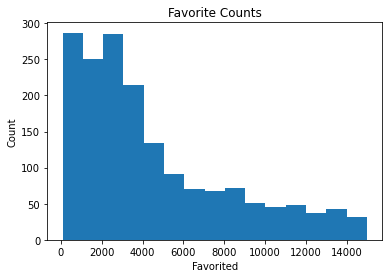

In [106]:
df1 = dog_archive_clean.loc[dog_archive_clean["favorite_count"] < 15000]

plt.hist(df1['favorite_count'], bins = 15)
plt.title("Favorite Counts")
plt.xlabel("Favorited")
plt.ylabel("Count")
plt.show()

-> More than 275 Tweets were favorited between 0 and 1000 times <br>
-> Almost 100 Tweets were favorited between 5000 and 6000 times 

In [85]:
dog_archive_clean['retweet_count'].describe()

count     2117.000000
mean      2826.723666
std       4690.613712
min         16.000000
25%        638.000000
50%       1392.000000
75%       3265.000000
max      79515.000000
Name: retweet_count, dtype: float64

I'm using the 75th percentile to approximatively set limit for the retweet counts used:

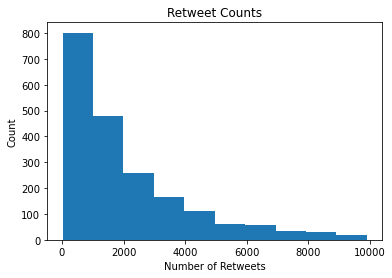

In [107]:
df2 = dog_archive_clean.loc[dog_archive_clean["retweet_count"] < 10000]

plt.hist(df2['retweet_count'], bins = 10)
plt.title("Retweet Counts")
plt.xlabel("Number of Retweets")
plt.ylabel("Count")
plt.show()

-> 800 tweets were retweeted between 0 and 1000 times 

4. Plot rating numerators to get insights about how dogs are rated 

In [87]:
dog_archive_clean.rating_numerator.quantile(0.9)

13.0

In [88]:
dog_archive_clean['rating_numerator'].describe()

count    2117.000000
mean       12.246103
std        40.275298
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

I'm using the 90th percentile to approximatively set limit for the rating numerator used:

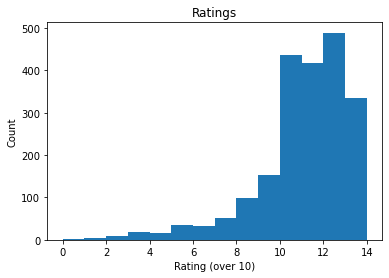

In [89]:
df3 = dog_archive_clean.loc[dog_archive_clean["rating_numerator"] < 15]

plt.hist(df3['rating_numerator'], bins = 14)
plt.title("Ratings")
plt.xlabel("Rating (over 10)")
plt.ylabel("Count")
plt.show()

-> Almost 500 dogs have a rating between 12 and 13 over 10